Following  https://allthingswater.github.io/netCDF_python/

In [2]:
import numpy as np                        # numerical computations
from matplotlib import pyplot as plt      # visualisation
import xarray as xr                       # for netcdf
import pandas as pd                       
import os

In [2]:
!pip install xarray
#conda install -c conda-forge xarray dask netCDF4 bottleneck

In [5]:
ds['t2m']

<xarray.DataArray 't2m' (time: 96432, latitude: 21, longitude: 21)>
[42526512 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -58.0 -57.75 -57.5 ... -53.5 -53.25 -53.0
  * latitude   (latitude) float32 -30.0 -30.25 -30.5 ... -34.5 -34.75 -35.0
  * time       (time) datetime64[ns] 2011-01-01 ... 2021-12-31T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [6]:
ds.t2m

<xarray.DataArray 't2m' (time: 96432, latitude: 21, longitude: 21)>
[42526512 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -58.0 -57.75 -57.5 ... -53.5 -53.25 -53.0
  * latitude   (latitude) float32 -30.0 -30.25 -30.5 ... -34.5 -34.75 -35.0
  * time       (time) datetime64[ns] 2011-01-01 ... 2021-12-31T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [4]:
ds = xr.open_dataset('Datos_t2m_horario_2011a2021_uy.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 21, latitude: 21, time: 96432)
Coordinates:
  * longitude  (longitude) float32 -58.0 -57.75 -57.5 ... -53.5 -53.25 -53.0
  * latitude   (latitude) float32 -30.0 -30.25 -30.5 ... -34.5 -34.75 -35.0
  * time       (time) datetime64[ns] 2011-01-01 ... 2021-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-12 19:36:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

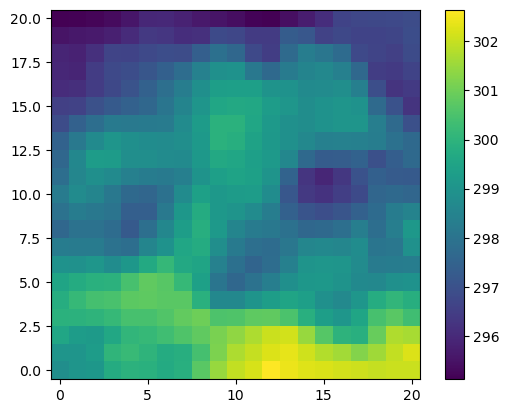

In [7]:
t2m_plot = plt.imshow(ds.t2m[180],origin="lower")
plt.colorbar(t2m_plot)

In [29]:
df = pd.DataFrame()
df['time'] = pd.to_datetime(ds.time)
df['temp'] = ds.t2m.mean(dim=["latitude","longitude"])
df.set_index('time')

,temp
time,
2011-01-01 00:00:00,297.323120
2011-01-01 01:00:00,297.159332
2011-01-01 02:00:00,296.502045
2011-01-01 03:00:00,295.313110
2011-01-01 04:00:00,295.022919
...,...
2021-12-31 19:00:00,306.261017
2021-12-31 20:00:00,305.979279
2021-12-31 21:00:00,305.094940


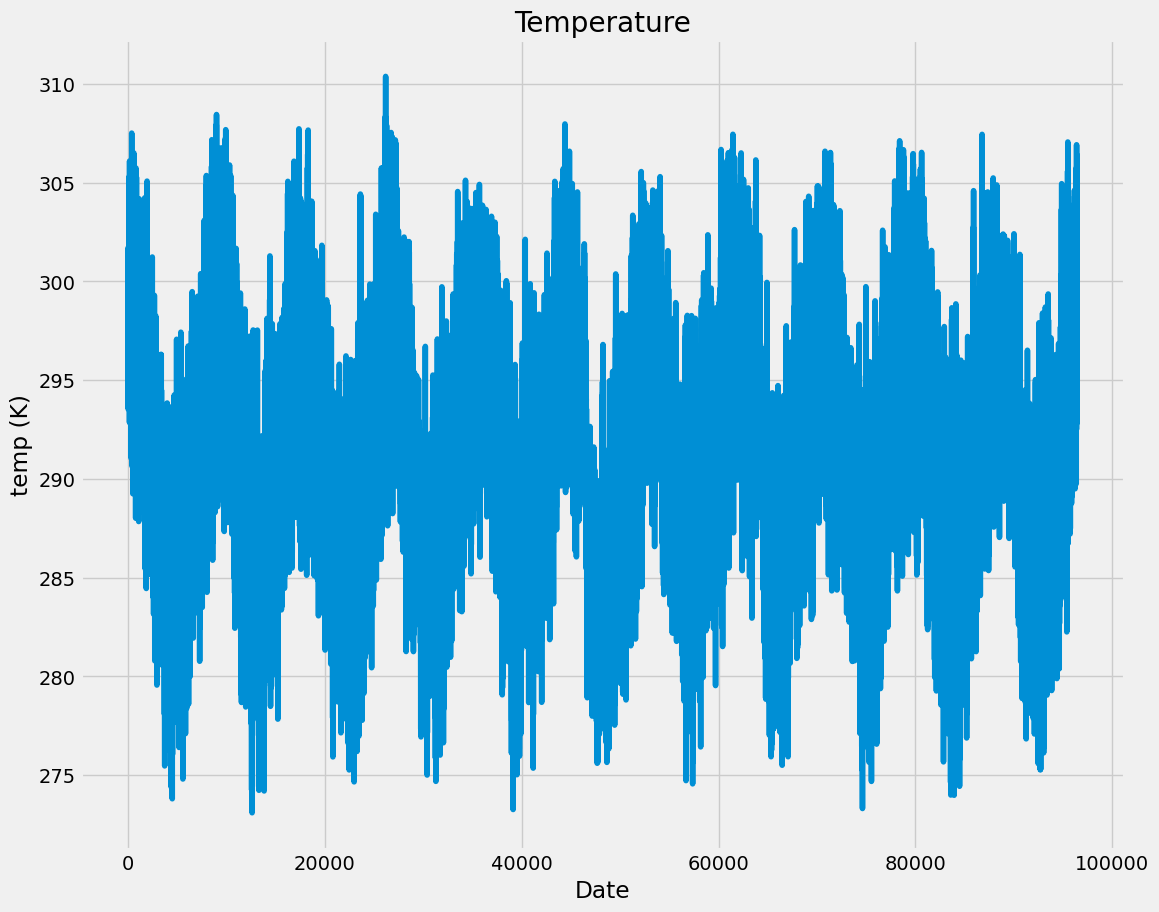

In [35]:
import matplotlib.pyplot as plt
 
# Using a inbuilt style to change the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(12, 10))
 
# Labelling the axes and setting 
# a title
plt.xlabel("Date")
plt.ylabel("temp (K)")
plt.title("Temperature")
 
# plotting the "A" column alone
plt.plot(df["temp"])

In [3]:
# worked with 2 nc files from Copernicus datasets;

f = xr.open_dataset("./sfcWind_Amon_CanESM2_historical_r1i1p1_185001-200512.nc")
f1 = xr.open_dataset("~/Downloads/tas_day_CSIRO-Mk3-6-0_amip_r1i1p1_19990101-20091231.nc")

In [4]:
df = pd.DataFrame()
df1 = pd.DataFrame()

timeIndex = f.indexes["time"].to_datetimeindex()
timeIndex1 = f1.indexes["time"].to_datetimeindex()

df["time"] = timeIndex
df1["time"] = timeIndex1

df['sfcWind'] = f.sfcWind.mean(dim=["lat", "lon"])
df1['tas'] = f1.tas.mean(dim=['lat', 'lon'])
df.set_index("time")
# output of the 1st dataset;
df

/var/folders/2q/vjyd16ln7gb7yt87jcg2fwr40000gn/T/ipykernel_27088/779484030.py:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeIndex = f.indexes["time"].to_datetimeindex()
/var/folders/2q/vjyd16ln7gb7yt87jcg2fwr40000gn/T/ipykernel_27088/779484030.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeIndex1 = f1.indexes["time"].to_datetimeindex()


,time,sfcWind
0,1850-01-16 12:00:00,6.752634
1,1850-02-15 00:00:00,6.937314
2,1850-03-16 12:00:00,7.001238
3,1850-04-16 00:00:00,7.072654
4,1850-05-16 12:00:00,7.066853
...,...,...
1867,2005-08-16 12:00:00,7.268555
1868,2005-09-16 00:00:00,7.195977
1869,2005-10-16 12:00:00,7.226689
1870,2005-11-16 00:00:00,7.074582


In [5]:
df1.set_index("time")
# output of the 2nd dataset;
df1

,time,tas
0,1999-01-01 12:00:00,277.612976
1,1999-01-02 12:00:00,277.684326
2,1999-01-03 12:00:00,277.721954
3,1999-01-04 12:00:00,277.730133
4,1999-01-05 12:00:00,277.754364
...,...,...
4010,2009-12-27 12:00:00,277.769836
4011,2009-12-28 12:00:00,277.886230
4012,2009-12-29 12:00:00,277.966675
4013,2009-12-30 12:00:00,278.095581


In [6]:
res = pd.merge_ordered(df1, df, on="time", how="outer")
res['toy'] = ((res['time'].dt.dayofyear)-0.5)/365
res

,time,tas,sfcWind,toy
0,1850-01-16 12:00:00,NaN,6.752634,0.042466
1,1850-02-15 00:00:00,NaN,6.937314,0.124658
2,1850-03-16 12:00:00,NaN,7.001238,0.204110
3,1850-04-16 00:00:00,NaN,7.072654,0.289041
4,1850-05-16 12:00:00,NaN,7.066853,0.371233
...,...,...,...,...
5833,2009-12-27 12:00:00,277.769836,NaN,0.987671
5834,2009-12-28 12:00:00,277.886230,NaN,0.990411
5835,2009-12-29 12:00:00,277.966675,NaN,0.993151
5836,2009-12-30 12:00:00,278.095581,NaN,0.995890


In [7]:
res.to_csv("results-fusion.csv", sep=';', index=False)
# res.to_excel("results-fusion.xlsx")